## **Breast Cancer Wisconsin (Dataset)**

Base de datos diagnostico de cancer de mama

El dataset cuenta con 569 Instancias, 30 caracteristicas (Identificacion, Diagnostico (M=Maligno o B=Benigno), y el calculo de diez caracteristicas para 3 nucelos celulares.


*   a) radio (media de distancias desde el centro a puntos en el perímetro)
*   b) textura (desviación estándar de los valores de escala de grises)
*   c) perímetro
*   d) área
*   e) suavidad (variación local en longitudes de radio)
*   f) compacidad (perímetro^2 / área - 1,0)
*   g) concavidad (severidad de las porciones cóncavas del contorno)
*   h ) puntos cóncavos (número de porciones cóncavas del contorno)
*   i) simetría
*   j) dimensión fractal ("aproximación de la línea costera" - 1)

---


### Importación de la libreria

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
x = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

### Importacion de Librerias, visualización y manipulación del dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import itertools
from sklearn.metrics import confusion_matrix

In [ ]:
print(x.info())
print("-"*100)
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [ ]:
x

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


**Modificacion de las variables**

In [ ]:
x.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

In [ ]:
y['Diagnosis'].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
y['Diagnosis'] = y['Diagnosis'].replace({"B":0,"M":1})
y

<ipython-input-9-85c3ff0a3f8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis'] = y['Diagnosis'].replace({"B":0,"M":1})


,Diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


Text(0, 0.5, 'Número de pacientes (muestra)')

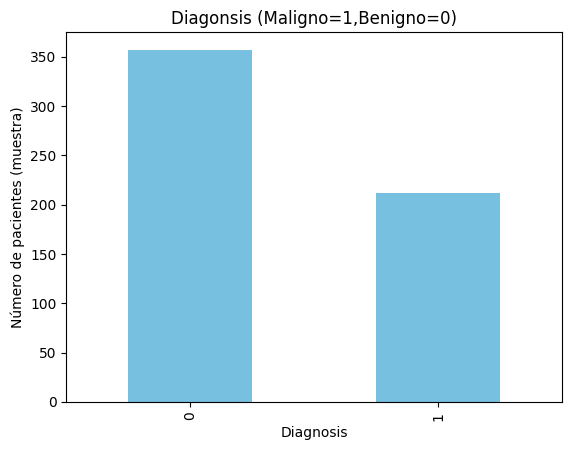

In [ ]:
y['Diagnosis'].value_counts().plot(kind='bar', color='#78C0E0')
plt.title('Diagonsis (Maligno=1,Benigno=0)')
plt.ylabel("Número de pacientes (muestra)")

In [ ]:
x.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

### Normalizacion de los datos

In [ ]:
df = x.copy()
df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
print("Información de las características del dataset:")
print(df.describe().round(2).transpose()[['count','mean','std','min','max']])

print("-"*100)

print("Información del objetivo del dataset:")
print(y.describe().round(2).transpose()[['count','mean','std','min','max']])

Información de las características del dataset:
                    count    mean     std     min      max
radius1             569.0   14.13    3.52    6.98    28.11
texture1            569.0   19.29    4.30    9.71    39.28
perimeter1          569.0   91.97   24.30   43.79   188.50
area1               569.0  654.89  351.91  143.50  2501.00
smoothness1         569.0    0.10    0.01    0.05     0.16
compactness1        569.0    0.10    0.05    0.02     0.35
concavity1          569.0    0.09    0.08    0.00     0.43
concave_points1     569.0    0.05    0.04    0.00     0.20
symmetry1           569.0    0.18    0.03    0.11     0.30
fractal_dimension1  569.0    0.06    0.01    0.05     0.10
radius2             569.0    0.41    0.28    0.11     2.87
texture2            569.0    1.22    0.55    0.36     4.88
perimeter2          569.0    2.87    2.02    0.76    21.98
area2               569.0   40.34   45.49    6.80   542.20
smoothness2         569.0    0.01    0.00    0.00     0.03
compactn

In [ ]:
# Función para normalizar los valores
def normalizar(x, xmax, xmin, ymax, ymin):  # El ymax y ymin son los valores que quiero que queden normalizados (ymax = 1) (ymin = 0)
  m = (ymax-ymin)/(xmax-xmin) # Pendiente
  b = ymin - m*xmin # Tengo elección, si escojo el ymax debo elegir xmax

  y = m*x + b

  return y

In [ ]:
max_vals = np.max(df, axis=0)
min_vals = np.min(df, axis=0)

print(f"{df.columns}\n")
print("Valores mínimos después de la normalización")
print(min_vals)
print("-"*100)
print("Valores máximos después de la normalización")
print(max_vals)

# Ahora puedes utilizar los valores máximo y mínimo para normalizar tu DataFrame
X_norm = normalizar(df, max_vals, min_vals, 1, 0)
X_norm.head()

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

Valores mínimos después de la normalización
radius1                 6.981000
texture1                9.710000
perimeter1             43.790000
area1                 143.500000
smoothness1             0.052630
compactness1            0.019380
concavity1              0.000000
concave_points1         0.000000
symmetry1               0.106000
fractal_dimension1      0.049960
radius2                 0.111500
texture2                0.360200
perimeter2              0.757000
area2              

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [ ]:
print("Información de las características del dataset normalizadp:")
print(X_norm.describe().round(2).transpose()[['count','mean','std','min','max']])
print("-"*100)
print("Información del objetivo del dataset normalizado:")
print(y.describe().round(2).transpose()[['count','mean','std','min','max']])

Información de las características del dataset normalizadp:
                    count  mean   std  min  max
radius1             569.0  0.34  0.17  0.0  1.0
texture1            569.0  0.32  0.15  0.0  1.0
perimeter1          569.0  0.33  0.17  0.0  1.0
area1               569.0  0.22  0.15  0.0  1.0
smoothness1         569.0  0.39  0.13  0.0  1.0
compactness1        569.0  0.26  0.16  0.0  1.0
concavity1          569.0  0.21  0.19  0.0  1.0
concave_points1     569.0  0.24  0.19  0.0  1.0
symmetry1           569.0  0.38  0.14  0.0  1.0
fractal_dimension1  569.0  0.27  0.15  0.0  1.0
radius2             569.0  0.11  0.10  0.0  1.0
texture2            569.0  0.19  0.12  0.0  1.0
perimeter2          569.0  0.10  0.10  0.0  1.0
area2               569.0  0.06  0.08  0.0  1.0
smoothness2         569.0  0.18  0.10  0.0  1.0
compactness2        569.0  0.17  0.13  0.0  1.0
concavity2          569.0  0.08  0.08  0.0  1.0
concave_points2     569.0  0.22  0.12  0.0  1.0
symmetry2           569.0  0

<Axes: title={'center': 'Con Normalizacion'}>

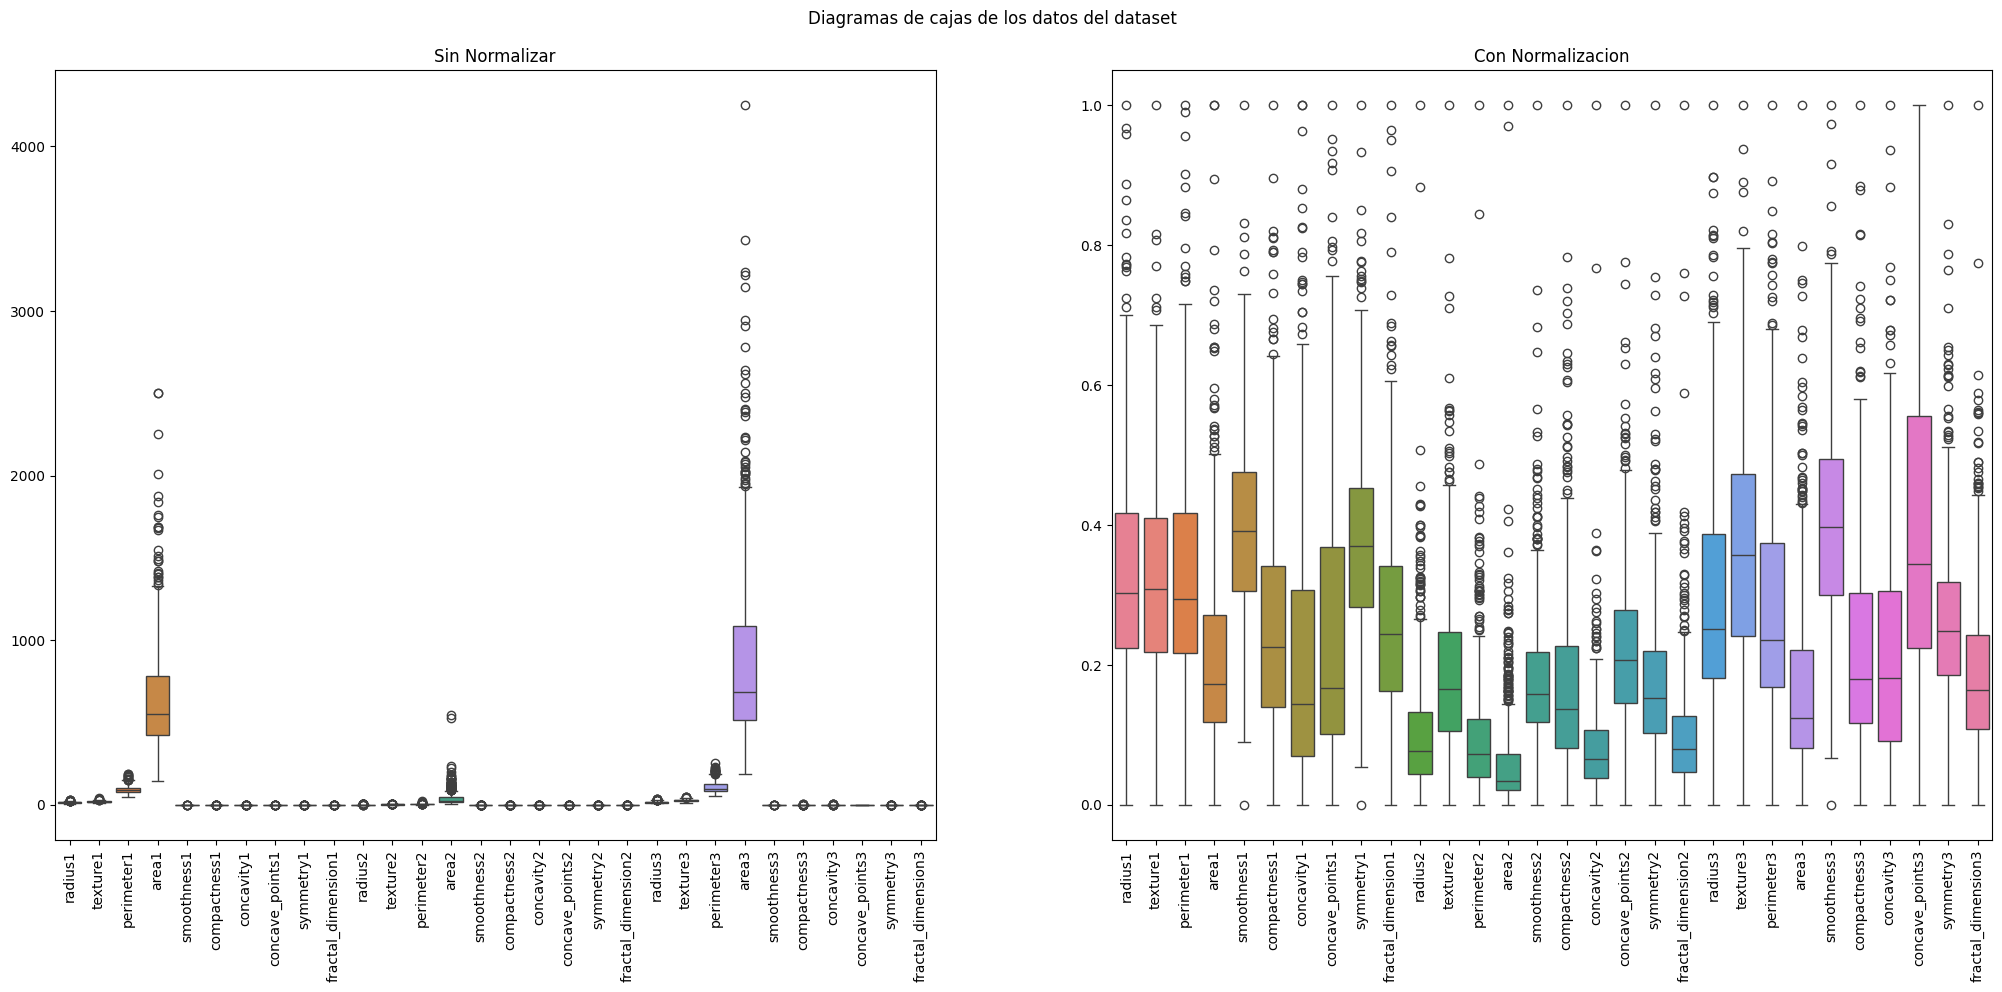

In [ ]:
plt.figure(figsize=(25,10))

plt.suptitle("Diagramas de cajas de los datos del dataset", y=0.94)
plt.subplot(1,2,1)
plt.title('Sin Normalizar')
plt.xticks(rotation=90)
sns.boxplot(df)


plt.subplot(1,2,2)
plt.title('Con Normalizacion')
plt.xticks(rotation=90)
sns.boxplot(X_norm)

### Visualización de los datos

In [ ]:
dfunion = pd.concat([x,y], axis=1)

In [ ]:
dfunionNorm = pd.concat([X_norm,y], axis=1)

Text(0.5, 1.0, 'Matriz de Correlación del dataset')

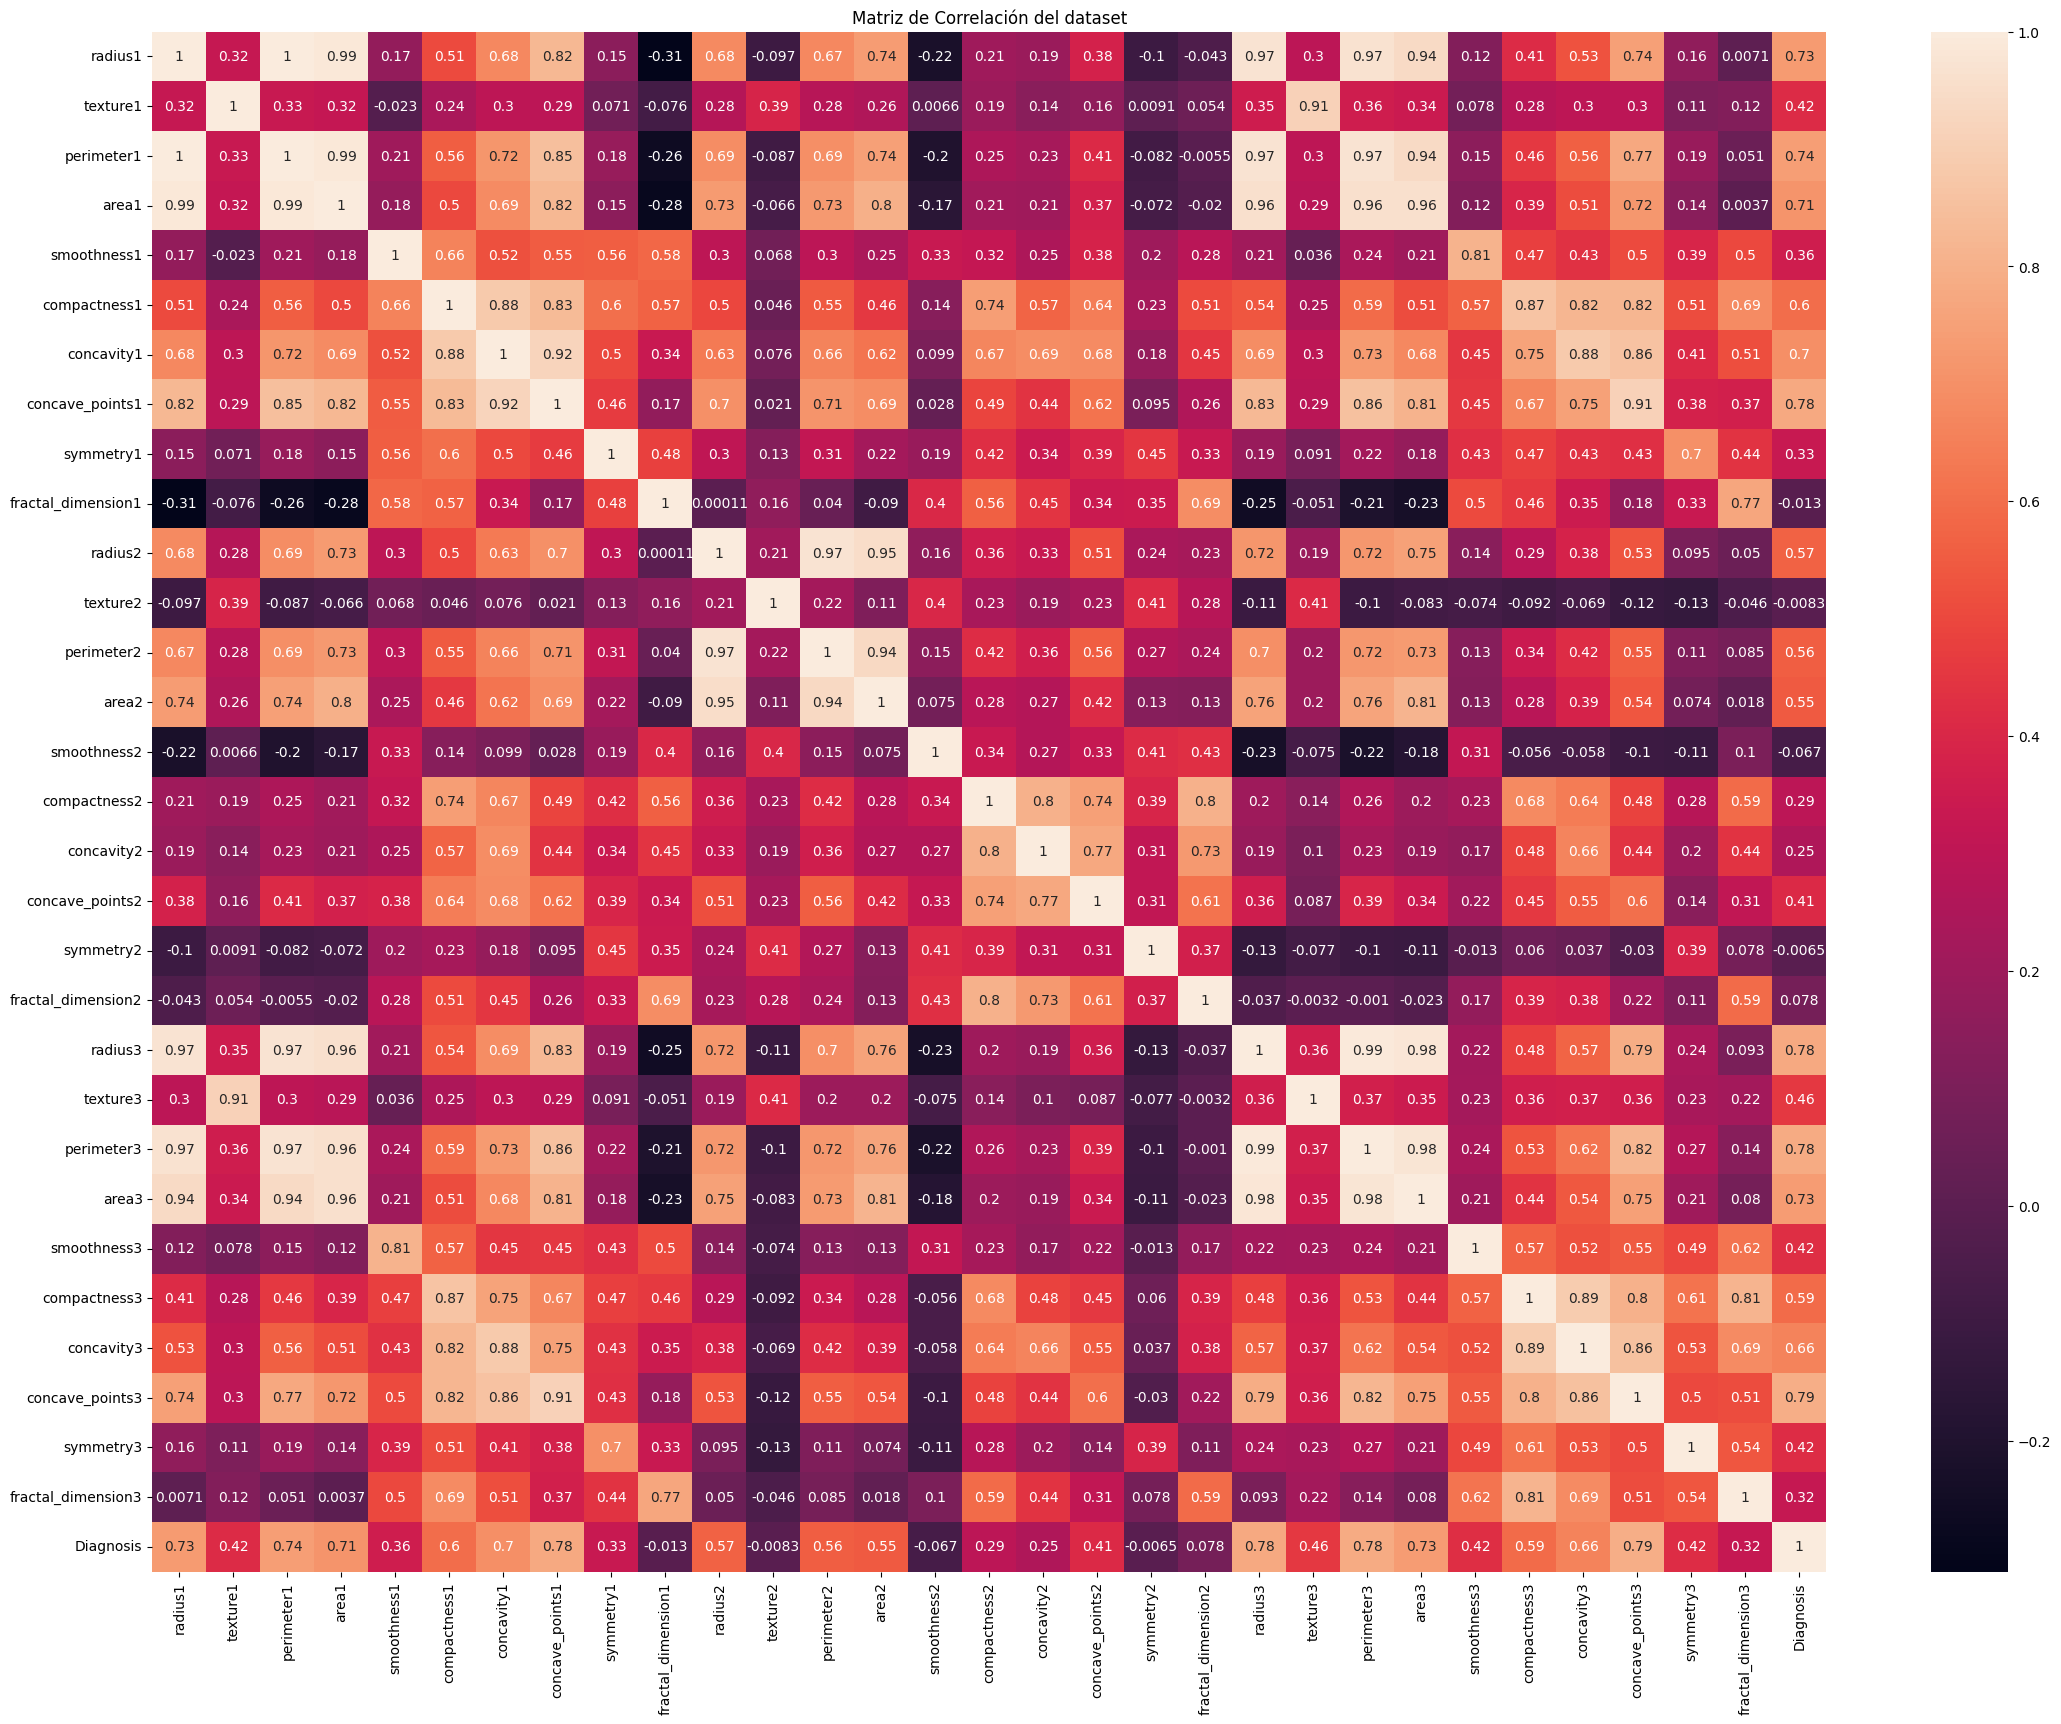

In [ ]:
# @title Matriz de Correlación
correlationNormal = dfunion.corr()
plt.figure(figsize=(27, 20))
sns.heatmap(correlationNormal, annot=True)
plt.xticks(rotation=90)
plt.title("Matriz de Correlación del dataset")

Text(0.5, 1.0, 'Matriz de Correlación del dataset normalizado')

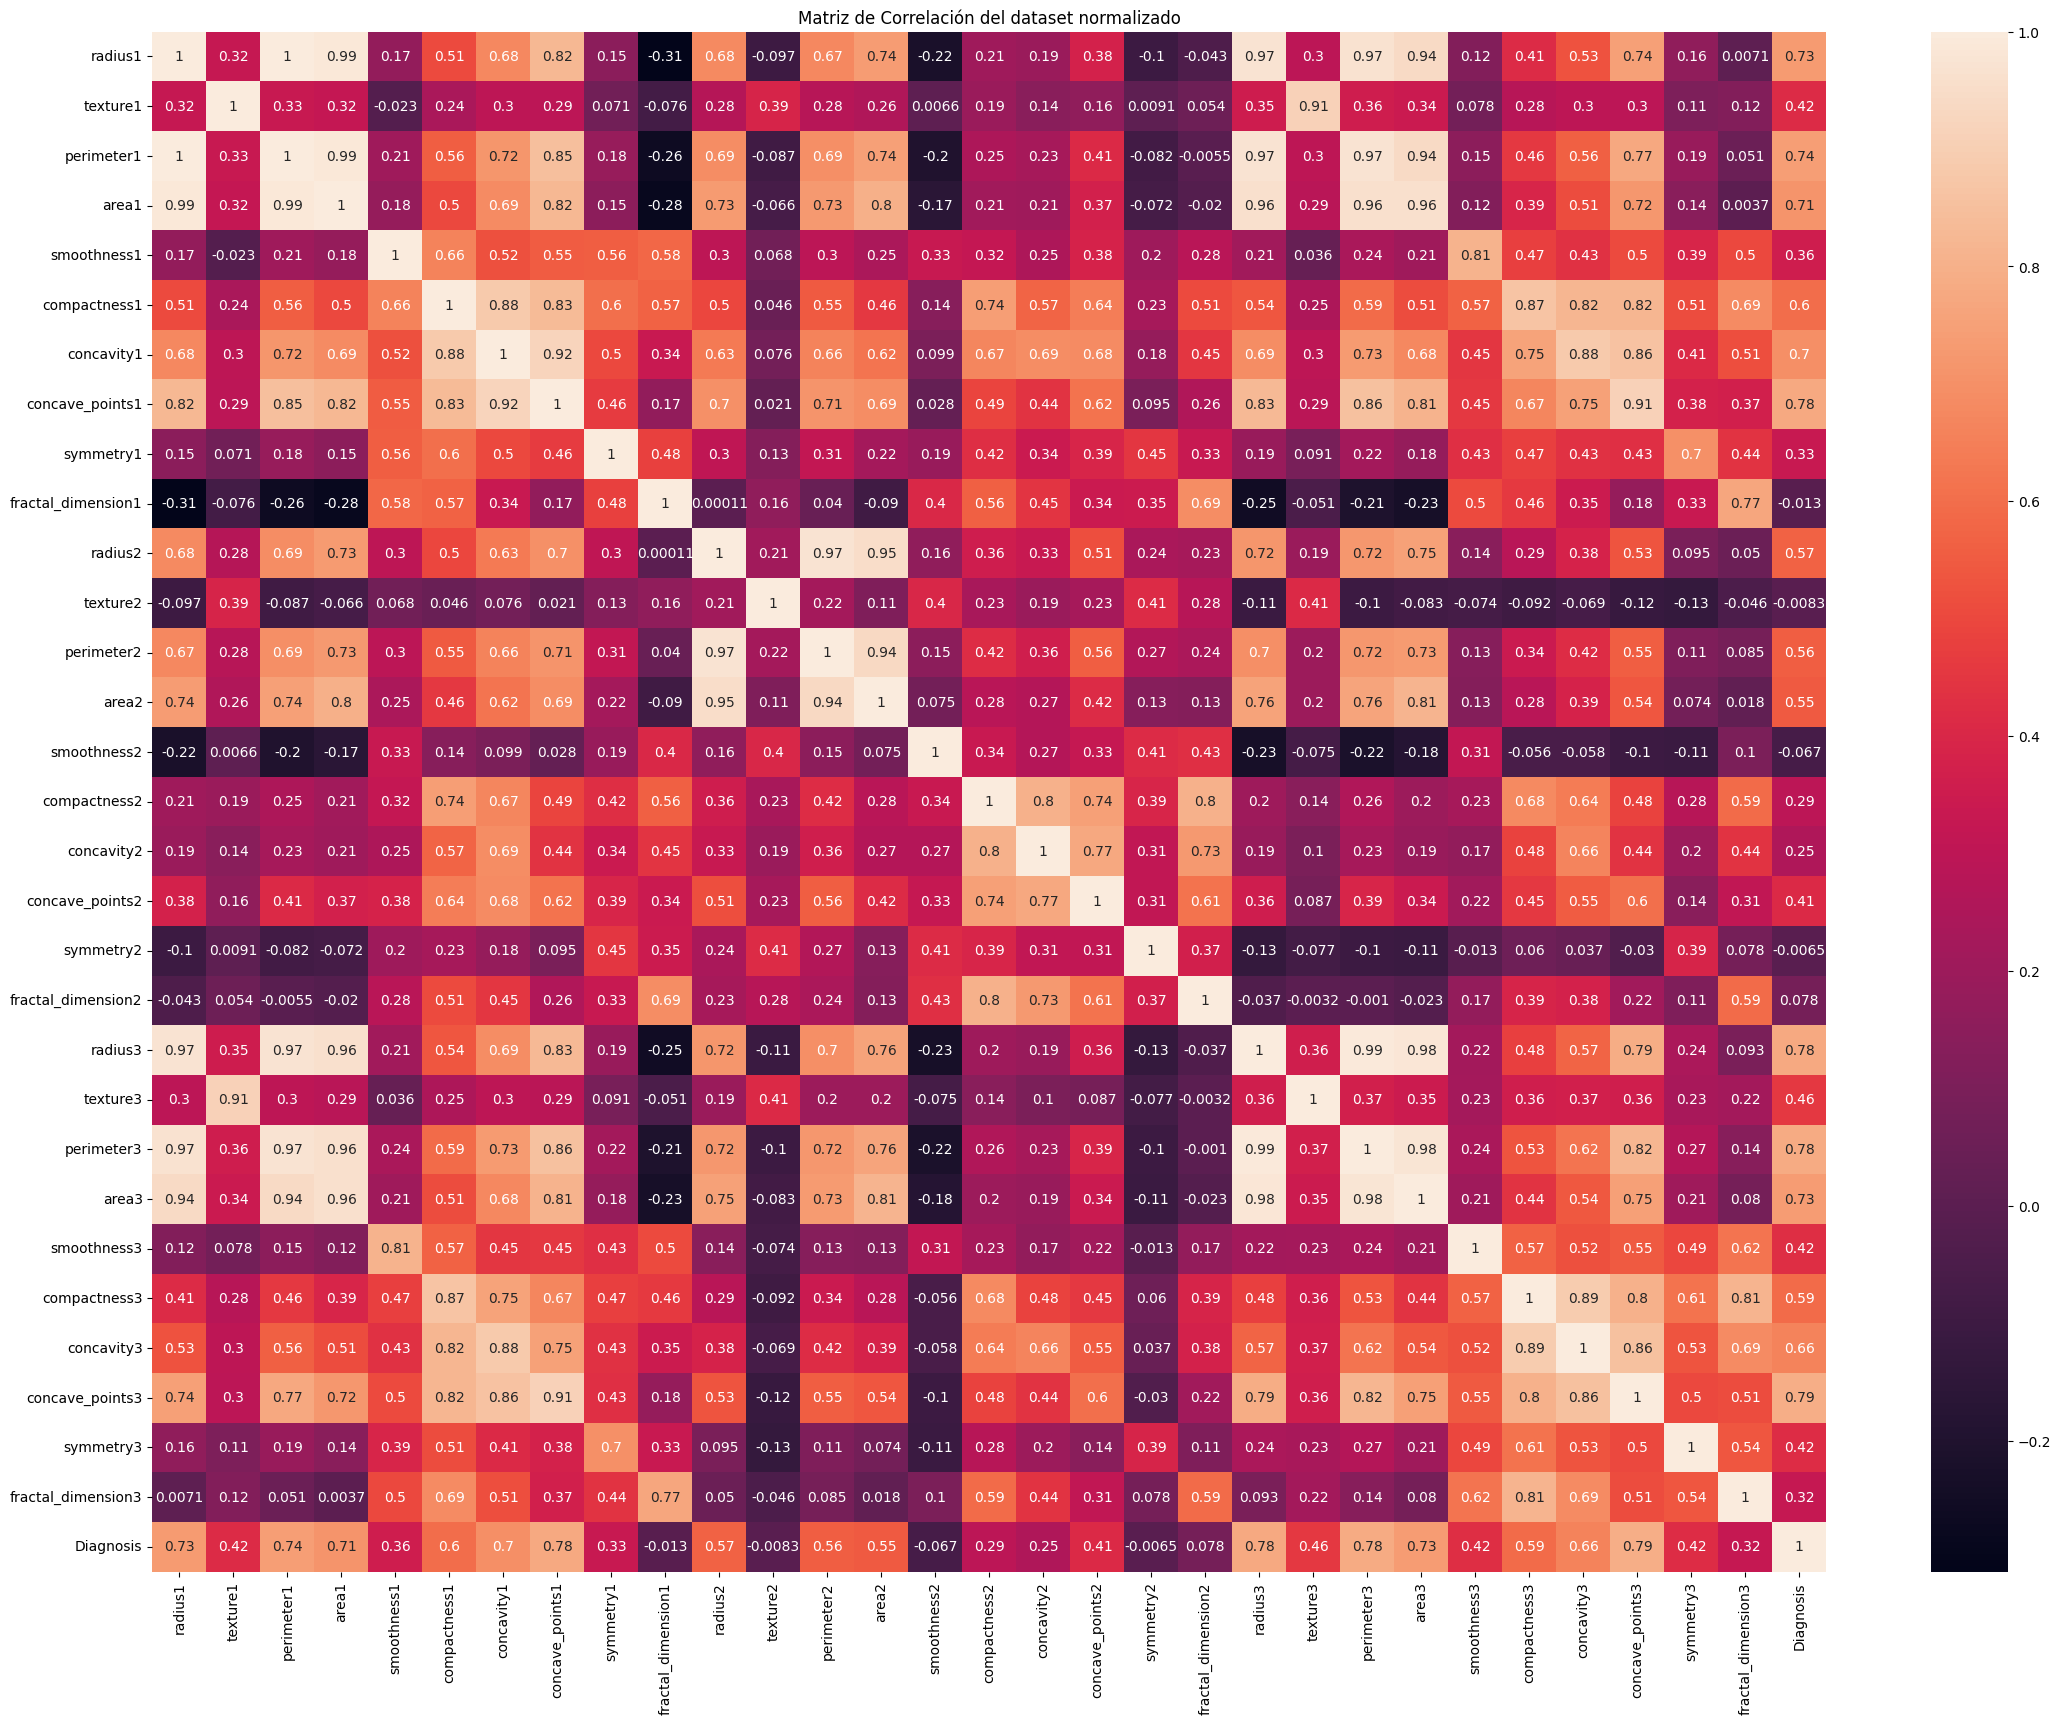

In [ ]:
# @title Matriz de Correlación Normalizada
correlationNormalizada = dfunionNorm.corr()
plt.figure(figsize=(27, 20))
sns.heatmap(correlationNormalizada, annot=True)
plt.xticks(rotation=90)
plt.title("Matriz de Correlación del dataset normalizado")

In [ ]:
# @title Distribución Valores
sns.pairplot(dfunion, hue="Diagnosis")
plt.suptitle("Distribución de valores")
plt.subplots_adjust(top=0.95)
plt.show()

# 0 --> Azul
# 1 --> Naranja

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7eac7da19120> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7eac7da183a0> (for post_execute):


KeyboardInterrupt: 

### Dividir el dataset

Dividimos el dataset en un 70% para datos de entrenamiento, y un 30% para datos de validacion

In [ ]:
print(x.shape)
print(y.shape)

(569, 30)
(569, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import sklearn.metrics as metrics

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm,y, test_size=0.3, random_state=42)

print(f"Los datos para entrenamiento son:\n{X_train.shape} y {y_train.shape}\n")
print(f"Los datos para realizar la validación son:\n{X_test.shape} y {y_test.shape}")

Los datos para entrenamiento son:
(398, 30) y (398, 1)

Los datos para realizar la validación son:
(171, 30) y (171, 1)


In [ ]:
y_test['Diagnosis'].value_counts()

Diagnosis
0    108
1     63
Name: count, dtype: int64

## **Algortimo de Perceptron**

In [ ]:
from sklearn.linear_model import Perceptron

p = Perceptron()
p.fit(X_train,y_train)

y_pred = p.predict(X_test)
print(y_pred)

[1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1
 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
p_norm = Perceptron()
p_norm.fit(X_train_norm,y_train_norm)

y_pred_norm = p_norm.predict(X_test_norm)
print(y_pred_norm)

[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
cantidad_0 = np.sum(y_pred == 0)
cantidad_1 = np.sum(y_pred == 1)

cantidad_0_norm = np.sum(y_pred_norm == 0)
cantidad_1_norm = np.sum(y_pred_norm == 1)


print(cantidad_0)
print(cantidad_1)
print("-"*20)
print(cantidad_0_norm)
print(cantidad_1_norm)

103
68
--------------------
109
62


### **Matriz de confusion Perceptron**

In [ ]:
confmatperceptron = confusion_matrix(y_true=y_test,y_pred=y_pred)
print(f'{confmatperceptron}\n')

confmatperceptron_norm = confusion_matrix(y_true=y_test_norm,y_pred=y_pred_norm)
print(confmatperceptron_norm)

[[100   8]
 [  3  60]]

[[106   2]
 [  3  60]]


Text(0.5, 1.12, 'Matriz de Confusión normalizado')

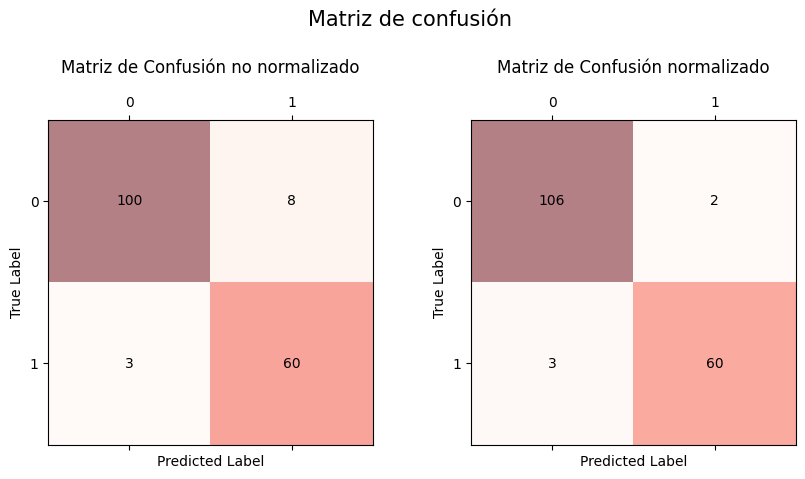

In [ ]:
# Matrices de confusión para no normalizados y normalizados
confmatperceptron = np.array(confmatperceptron)
confmatperceptron_norm = np.array(confmatperceptron_norm)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle("Matriz de confusión", fontsize=15)
plt.subplots_adjust(top=0.76)

# Primer subgráfico
axs[0].matshow(confmatperceptron, cmap=plt.cm.Reds, alpha=0.5)

for i in range(confmatperceptron.shape[0]):
    for j in range(confmatperceptron.shape[1]):
        axs[0].text(x=j, y=i,
                 s=confmatperceptron[i, j],
                 va='center', ha='center')

axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')
axs[0].set_title('Matriz de Confusión no normalizado', y=1.12)


# Segundo subgráfico
axs[1].matshow(confmatperceptron_norm, cmap=plt.cm.Reds, alpha=0.5)


for i in range(confmatperceptron_norm.shape[0]):
    for j in range(confmatperceptron_norm.shape[1]):
        axs[1].text(x=j, y=i,
                 s=confmatperceptron_norm[i, j],
                 va='center', ha='center')

axs[1].set_xlabel('Predicted Label')
axs[1].set_ylabel('True Label')
axs[1].set_title('Matriz de Confusión normalizado', y=1.12)

## **Regresion Logistica**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_predlr = lr.predict(X_test)
print(y_predlr)

[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lr_norm = LogisticRegression()
lr_norm.fit(X_train_norm, y_train_norm)

y_predlr_norm = lr_norm.predict(X_test_norm)
print(y_predlr_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


### **Matriz de confusion Regresion Logistica**

In [ ]:
confmatlr = confusion_matrix(y_true=y_test,y_pred=y_predlr)
print(f'{confmatlr}\n')

confmatlr_norm = confusion_matrix(y_true=y_test_norm,y_pred=y_predlr_norm)
print(confmatlr_norm)

[[107   1]
 [  4  59]]

[[108   0]
 [  4  59]]


Text(0.5, 1.12, 'Matriz de Confusión normalizado')

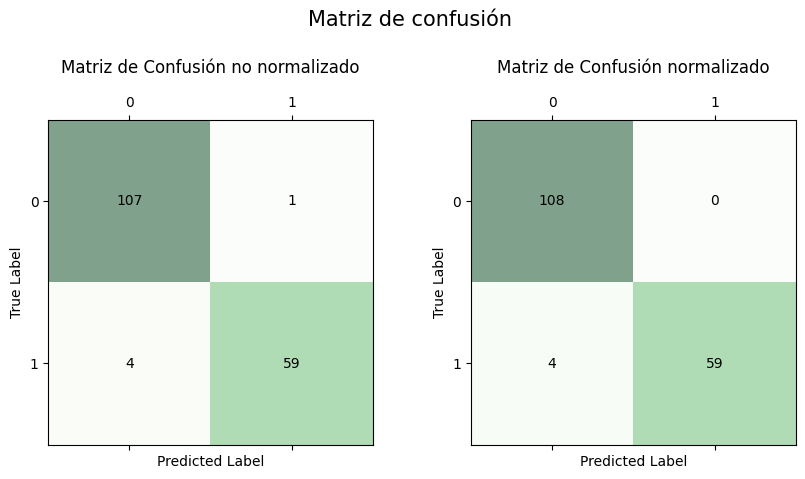

In [ ]:
# Matrices de confusión para no normalizados y normalizados
confmatlr = np.array(confmatlr)
confmatlr_norm = np.array(confmatlr_norm)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle("Matriz de confusión", fontsize=15)
plt.subplots_adjust(top=0.76)

# Primer subgráfico
axs[0].matshow(confmatlr, cmap=plt.cm.Greens, alpha=0.5)

for i in range(confmatlr.shape[0]):
    for j in range(confmatlr.shape[1]):
        axs[0].text(x=j, y=i,
                 s=confmatlr[i, j],
                 va='center', ha='center')

axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')
axs[0].set_title('Matriz de Confusión no normalizado', y=1.12)


# Segundo subgráfico
axs[1].matshow(confmatlr_norm, cmap=plt.cm.Greens, alpha=0.5)


for i in range(confmatlr_norm.shape[0]):
    for j in range(confmatlr_norm.shape[1]):
        axs[1].text(x=j, y=i,
                 s=confmatlr_norm[i, j],
                 va='center', ha='center')

axs[1].set_xlabel('Predicted Label')
axs[1].set_ylabel('True Label')
axs[1].set_title('Matriz de Confusión normalizado', y=1.12)

## **Algoritmo de Claisificacion Naive  Bayes**

El teorema de clasificación de Naive Bayes se utiliza para predecir la clase a la que pertenece una instancia, dadas sus características observadas. Utiliza la probabilidad condicional de la clase dada las características, calculada utilizando el teorema de Bayes.

Alguna de las ventajas son:


*   Simplicidad
*   Buen rendimiento en conjuntos de alta dimensionalidad




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

X_trainNaive, X_testNaive, y_trainNaive, y_testNaive = train_test_split(x,y, test_size=0.3, random_state=42)

print(X_trainNaive.shape)
print(y_trainNaive.shape)
print(X_testNaive.shape)
print(y_testNaive.shape)

naive_bayes = GaussianNB()

naive_bayes.fit(X_trainNaive, y_trainNaive)

y_predNaive = naive_bayes.predict(X_testNaive)

print(classification_report(y_testNaive, y_predNaive))

(398, 30)
(398, 1)
(171, 30)
(171, 1)
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
confmatNaive = confusion_matrix(y_true=y_testNaive,y_pred=y_predNaive)
print(confmatNaive)

[[104   4]
 [  6  57]]


### **Matriz de confusion Naive Bayes**

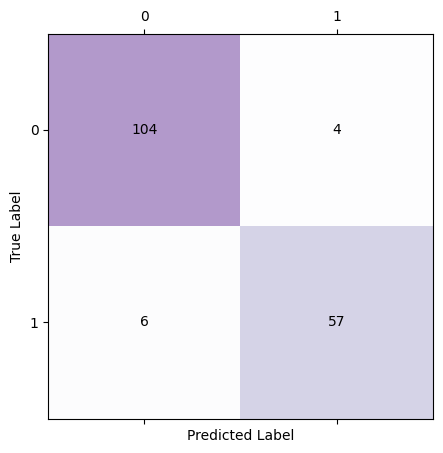

In [ ]:
confmatNaive = np.array(confmatNaive)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmatNaive, cmap=plt.cm.Purples, alpha=0.4)

for i in range(confmatNaive.shape[0]):
    for j in range(confmatNaive.shape[1]):
        ax.text(x=j, y=i,
                s=confmatNaive[i, j],
                va='center', ha='center')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##Multiple modelos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    AdaBoostClassifier(),
    RandomForestClassifier(),
    SVC()
]

scalers = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler()
]

samplers = [
    RandomOverSampler(),
    SMOTE(),
    RandomUnderSampler()
]



In [ ]:
param_grids = {
    LogisticRegression: {'logisticregression__C': [0.1, 1, 10]},
    KNeighborsClassifier: {'kneighborsclassifier__n_neighbors': [3, 5, 7],
                           'kneighborsclassifier__weights': ['uniform', 'distance']},
    DecisionTreeClassifier: {'decisiontreeclassifier__max_depth': [3, 5, None],
                             'decisiontreeclassifier__min_samples_split': [2, 5, 10]},
    GaussianNB: {},
    AdaBoostClassifier: {'adaboostclassifier__n_estimators': [50, 100, 200],
                         'adaboostclassifier__learning_rate': [0.1, 0.5, 1.0]},
    RandomForestClassifier: {'randomforestclassifier__n_estimators': [50, 100, 200],
                             'randomforestclassifier__max_depth': [3, 5, None]},
    SVC: {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']},
     RandomOverSampler: {'randomoversampler__sampling_strategy': ['auto', 'minority', 'not minority']},
    SMOTE: {'smote__sampling_strategy': ['auto', 'minority', 'not minority']},
    RandomUnderSampler: {'randomundersampler__sampling_strategy': ['auto', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
    StandardScaler: {},
    MinMaxScaler: {},
    RobustScaler: {}
}
n_components_list = [5,10,15,20,25]

In [ ]:
def train_and_evaluate(pipeline, X_train, y_train, X_test, y_test):
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    scaler_params = param_grids[type(pipeline[0])]  # Parameters for the scaler
    sampler_params = param_grids[type(pipeline[1])]  # Parameters for the sampler
    classifier_params = param_grids[type(pipeline[-1])]  # Parameters for the classifier
    param_grid = {**scaler_params, **sampler_params, **classifier_params}
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    score = best_model.score(X_test, y_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    return score, best_model, conf_matrix, class_report

In [ ]:
best_score = 0
best_model = None
confussion = None
report = None

for classifier in classifiers:
    for scaler in scalers:
        for sampler in samplers:
          for n_components in n_components_list:
            pipeline = make_pipeline(scaler, sampler, PCA(n_components=n_components),classifier)
            score, model, conf_matrix, class_report = train_and_evaluate(pipeline, X_train_norm, y_train_norm, X_test_norm, y_test_norm)
            if score > best_score:
                best_score = score
                best_model = model
                confussion = conf_matrix
                report = class_report

            print(f"Classifier: {classifier.__class__.__name__}, Scaler: {scaler.__class__.__name__}, "
                      f"Sampler: {sampler.__class__.__name__}, n_components: {n_components}, Score: {score}, "
                      f"Best Parameters: {model.get_params()}")
            print(conf_matrix)
            print(class_report)

print(f"El mejor modelo tiene un puntaje de: {best_score}")
print(f"Los parámetros del mejor modelo son: {best_model.get_params()}")

Classifier: LogisticRegression, Scaler: StandardScaler, Sampler: RandomOverSampler, n_components: 5, Score: 0.9883040935672515, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomoversampler', RandomOverSampler(sampling_strategy='not minority')), ('pca', PCA(n_components=5)), ('logisticregression', LogisticRegression(C=1))], 'verbose': False, 'standardscaler': StandardScaler(), 'randomoversampler': RandomOverSampler(sampling_strategy='not minority'), 'pca': PCA(n_components=5), 'logisticregression': LogisticRegression(C=1), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomoversampler__random_state': None, 'randomoversampler__sampling_strategy': 'not minority', 'randomoversampler__shrinkage': None, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 5, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
78 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10

Classifier: LogisticRegression, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 5, Score: 0.9707602339181286, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.8)), ('pca', PCA(n_components=5)), ('logisticregression', LogisticRegression(C=1))], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.8), 'pca': PCA(n_components=5), 'logisticregression': LogisticRegression(C=1), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.8, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 5, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
78 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10

Classifier: LogisticRegression, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 10, Score: 0.9941520467836257, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.9)), ('pca', PCA(n_components=10)), ('logisticregression', LogisticRegression(C=0.1))], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.9), 'pca': PCA(n_components=10), 'logisticregression': LogisticRegression(C=0.1), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.9, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 10, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
78 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10

Classifier: LogisticRegression, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 15, Score: 0.9941520467836257, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.8)), ('pca', PCA(n_components=15)), ('logisticregression', LogisticRegression(C=0.1))], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.8), 'pca': PCA(n_components=15), 'logisticregression': LogisticRegression(C=0.1), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.8, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 15, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
78 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10

Classifier: LogisticRegression, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 20, Score: 0.9883040935672515, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.8)), ('pca', PCA(n_components=20)), ('logisticregression', LogisticRegression(C=0.1))], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.8), 'pca': PCA(n_components=20), 'logisticregression': LogisticRegression(C=0.1), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.8, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 20, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
78 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10

Classifier: LogisticRegression, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 25, Score: 0.9941520467836257, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.9)), ('pca', PCA(n_components=25)), ('logisticregression', LogisticRegression(C=0.1))], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.9), 'pca': PCA(n_components=25), 'logisticregression': LogisticRegression(C=0.1), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.9, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 25, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
78 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10

Classifier: LogisticRegression, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 5, Score: 0.9766081871345029, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.8)), ('pca', PCA(n_components=5)), ('logisticregression', LogisticRegression(C=10))], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.8), 'pca': PCA(n_components=5), 'logisticregression': LogisticRegression(C=10), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.8, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 5, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': F

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
78 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10

Classifier: LogisticRegression, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 10, Score: 0.9883040935672515, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.7)), ('pca', PCA(n_components=10)), ('logisticregression', LogisticRegression(C=10))], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.7), 'pca': PCA(n_components=10), 'logisticregression': LogisticRegression(C=10), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.7, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 10, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
78 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10

Classifier: LogisticRegression, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 15, Score: 0.9883040935672515, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.7)), ('pca', PCA(n_components=15)), ('logisticregression', LogisticRegression(C=10))], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.7), 'pca': PCA(n_components=15), 'logisticregression': LogisticRegression(C=10), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.7, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 15, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
78 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10

Classifier: LogisticRegression, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 20, Score: 0.9766081871345029, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.8)), ('pca', PCA(n_components=20)), ('logisticregression', LogisticRegression(C=10))], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.8), 'pca': PCA(n_components=20), 'logisticregression': LogisticRegression(C=10), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.8, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 20, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
78 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10

Classifier: LogisticRegression, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 25, Score: 0.9824561403508771, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.7)), ('pca', PCA(n_components=25)), ('logisticregression', LogisticRegression(C=10))], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.7), 'pca': PCA(n_components=25), 'logisticregression': LogisticRegression(C=10), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.7, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 25, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
78 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10

Classifier: LogisticRegression, Scaler: RobustScaler, Sampler: RandomUnderSampler, n_components: 5, Score: 0.9824561403508771, Best Parameters: {'memory': None, 'steps': [('robustscaler', RobustScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.8)), ('pca', PCA(n_components=5)), ('logisticregression', LogisticRegression(C=1))], 'verbose': False, 'robustscaler': RobustScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.8), 'pca': PCA(n_components=5), 'logisticregression': LogisticRegression(C=1), 'robustscaler__copy': True, 'robustscaler__quantile_range': (25.0, 75.0), 'robustscaler__unit_variance': False, 'robustscaler__with_centering': True, 'robustscaler__with_scaling': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.8, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 5, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto',

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
78 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10

Classifier: LogisticRegression, Scaler: RobustScaler, Sampler: RandomUnderSampler, n_components: 10, Score: 0.9766081871345029, Best Parameters: {'memory': None, 'steps': [('robustscaler', RobustScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.8)), ('pca', PCA(n_components=10)), ('logisticregression', LogisticRegression(C=10))], 'verbose': False, 'robustscaler': RobustScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.8), 'pca': PCA(n_components=10), 'logisticregression': LogisticRegression(C=10), 'robustscaler__copy': True, 'robustscaler__quantile_range': (25.0, 75.0), 'robustscaler__unit_variance': False, 'robustscaler__with_centering': True, 'robustscaler__with_scaling': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.8, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 10, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': '

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
78 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10

Classifier: LogisticRegression, Scaler: RobustScaler, Sampler: RandomUnderSampler, n_components: 15, Score: 0.9883040935672515, Best Parameters: {'memory': None, 'steps': [('robustscaler', RobustScaler()), ('randomundersampler', RandomUnderSampler()), ('pca', PCA(n_components=15)), ('logisticregression', LogisticRegression(C=0.1))], 'verbose': False, 'robustscaler': RobustScaler(), 'randomundersampler': RandomUnderSampler(), 'pca': PCA(n_components=15), 'logisticregression': LogisticRegression(C=0.1), 'robustscaler__copy': True, 'robustscaler__quantile_range': (25.0, 75.0), 'robustscaler__unit_variance': False, 'robustscaler__with_centering': True, 'robustscaler__with_scaling': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 'auto', 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 15, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pc

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
78 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10

Classifier: LogisticRegression, Scaler: RobustScaler, Sampler: RandomUnderSampler, n_components: 20, Score: 0.9824561403508771, Best Parameters: {'memory': None, 'steps': [('robustscaler', RobustScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.7)), ('pca', PCA(n_components=20)), ('logisticregression', LogisticRegression(C=1))], 'verbose': False, 'robustscaler': RobustScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.7), 'pca': PCA(n_components=20), 'logisticregression': LogisticRegression(C=1), 'robustscaler__copy': True, 'robustscaler__quantile_range': (25.0, 75.0), 'robustscaler__unit_variance': False, 'robustscaler__with_centering': True, 'robustscaler__with_scaling': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.7, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 20, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'au

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
78 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10

Classifier: LogisticRegression, Scaler: RobustScaler, Sampler: RandomUnderSampler, n_components: 25, Score: 0.9941520467836257, Best Parameters: {'memory': None, 'steps': [('robustscaler', RobustScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.9)), ('pca', PCA(n_components=25)), ('logisticregression', LogisticRegression(C=0.1))], 'verbose': False, 'robustscaler': RobustScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.9), 'pca': PCA(n_components=25), 'logisticregression': LogisticRegression(C=0.1), 'robustscaler__copy': True, 'robustscaler__quantile_range': (25.0, 75.0), 'robustscaler__unit_variance': False, 'robustscaler__with_centering': True, 'robustscaler__with_scaling': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.9, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 25, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer':

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
156 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
156 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: KNeighborsClassifier, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 5, Score: 0.9649122807017544, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.9)), ('pca', PCA(n_components=5)), ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7, weights='distance'))], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.9), 'pca': PCA(n_components=5), 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=7, weights='distance'), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.9, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 5, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
156 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
156 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: KNeighborsClassifier, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 10, Score: 0.9649122807017544, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.7)), ('pca', PCA(n_components=10)), ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7))], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.7), 'pca': PCA(n_components=10), 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=7), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.7, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 10, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solve

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
156 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
156 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: KNeighborsClassifier, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 15, Score: 0.9590643274853801, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler()), ('pca', PCA(n_components=15)), ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7, weights='distance'))], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(), 'pca': PCA(n_components=15), 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=7, weights='distance'), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 'auto', 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 15, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solv

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
156 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
156 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: KNeighborsClassifier, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 20, Score: 0.9590643274853801, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.9)), ('pca', PCA(n_components=20)), ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7))], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.9), 'pca': PCA(n_components=20), 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=7), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.9, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 20, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solve

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
156 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
156 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: KNeighborsClassifier, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 25, Score: 0.9532163742690059, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler()), ('pca', PCA(n_components=25)), ('kneighborsclassifier', KNeighborsClassifier(weights='distance'))], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(), 'pca': PCA(n_components=25), 'kneighborsclassifier': KNeighborsClassifier(weights='distance'), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 'auto', 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 25, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
156 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
156 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: KNeighborsClassifier, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 5, Score: 0.9707602339181286, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.8)), ('pca', PCA(n_components=5)), ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7))], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.8), 'pca': PCA(n_components=5), 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=7), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.8, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 5, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
156 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
156 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: KNeighborsClassifier, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 10, Score: 0.9473684210526315, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.8)), ('pca', PCA(n_components=10)), ('kneighborsclassifier', KNeighborsClassifier())], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.8), 'pca': PCA(n_components=10), 'kneighborsclassifier': KNeighborsClassifier(), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.8, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 10, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whit

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
156 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
156 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: KNeighborsClassifier, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 15, Score: 0.9473684210526315, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.9)), ('pca', PCA(n_components=15)), ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7, weights='distance'))], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.9), 'pca': PCA(n_components=15), 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=7, weights='distance'), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.9, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 15, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_st

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
156 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
156 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: KNeighborsClassifier, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 20, Score: 0.9473684210526315, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.9)), ('pca', PCA(n_components=20)), ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7))], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.9), 'pca': PCA(n_components=20), 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=7), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.9, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 20, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', '

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
156 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
156 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: KNeighborsClassifier, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 25, Score: 0.9649122807017544, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.9)), ('pca', PCA(n_components=25)), ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3, weights='distance'))], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.9), 'pca': PCA(n_components=25), 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=3, weights='distance'), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.9, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 25, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_st

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
156 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
156 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: KNeighborsClassifier, Scaler: RobustScaler, Sampler: RandomUnderSampler, n_components: 5, Score: 0.9473684210526315, Best Parameters: {'memory': None, 'steps': [('robustscaler', RobustScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.7)), ('pca', PCA(n_components=5)), ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7, weights='distance'))], 'verbose': False, 'robustscaler': RobustScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.7), 'pca': PCA(n_components=5), 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=7, weights='distance'), 'robustscaler__copy': True, 'robustscaler__quantile_range': (25.0, 75.0), 'robustscaler__unit_variance': False, 'robustscaler__with_centering': True, 'robustscaler__with_scaling': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.7, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 5

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
156 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
156 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: KNeighborsClassifier, Scaler: RobustScaler, Sampler: RandomUnderSampler, n_components: 10, Score: 0.9590643274853801, Best Parameters: {'memory': None, 'steps': [('robustscaler', RobustScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.8)), ('pca', PCA(n_components=10)), ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))], 'verbose': False, 'robustscaler': RobustScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.8), 'pca': PCA(n_components=10), 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=3), 'robustscaler__copy': True, 'robustscaler__quantile_range': (25.0, 75.0), 'robustscaler__unit_variance': False, 'robustscaler__with_centering': True, 'robustscaler__with_scaling': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.8, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 10, 'pca__n_oversamples': 10, 'pca__po

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
156 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
156 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: KNeighborsClassifier, Scaler: RobustScaler, Sampler: RandomUnderSampler, n_components: 15, Score: 0.9649122807017544, Best Parameters: {'memory': None, 'steps': [('robustscaler', RobustScaler()), ('randomundersampler', RandomUnderSampler()), ('pca', PCA(n_components=15)), ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7))], 'verbose': False, 'robustscaler': RobustScaler(), 'randomundersampler': RandomUnderSampler(), 'pca': PCA(n_components=15), 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=7), 'robustscaler__copy': True, 'robustscaler__quantile_range': (25.0, 75.0), 'robustscaler__unit_variance': False, 'robustscaler__with_centering': True, 'robustscaler__with_scaling': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 'auto', 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 15, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
156 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
156 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: KNeighborsClassifier, Scaler: RobustScaler, Sampler: RandomUnderSampler, n_components: 20, Score: 0.9649122807017544, Best Parameters: {'memory': None, 'steps': [('robustscaler', RobustScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.9)), ('pca', PCA(n_components=20)), ('kneighborsclassifier', KNeighborsClassifier())], 'verbose': False, 'robustscaler': RobustScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.9), 'pca': PCA(n_components=20), 'kneighborsclassifier': KNeighborsClassifier(), 'robustscaler__copy': True, 'robustscaler__quantile_range': (25.0, 75.0), 'robustscaler__unit_variance': False, 'robustscaler__with_centering': True, 'robustscaler__with_scaling': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.9, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 20, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer':

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
156 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
156 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: KNeighborsClassifier, Scaler: RobustScaler, Sampler: RandomUnderSampler, n_components: 25, Score: 0.9590643274853801, Best Parameters: {'memory': None, 'steps': [('robustscaler', RobustScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.9)), ('pca', PCA(n_components=25)), ('kneighborsclassifier', KNeighborsClassifier())], 'verbose': False, 'robustscaler': RobustScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.9), 'pca': PCA(n_components=25), 'kneighborsclassifier': KNeighborsClassifier(), 'robustscaler__copy': True, 'robustscaler__quantile_range': (25.0, 75.0), 'robustscaler__unit_variance': False, 'robustscaler__with_centering': True, 'robustscaler__with_scaling': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.9, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 25, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer':

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: DecisionTreeClassifier, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 5, Score: 0.9415204678362573, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.8)), ('pca', PCA(n_components=5)), ('decisiontreeclassifier', DecisionTreeClassifier())], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.8), 'pca': PCA(n_components=5), 'decisiontreeclassifier': DecisionTreeClassifier(), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.8, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 5, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__to

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: DecisionTreeClassifier, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 10, Score: 0.9005847953216374, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.7)), ('pca', PCA(n_components=10)), ('decisiontreeclassifier', DecisionTreeClassifier())], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.7), 'pca': PCA(n_components=10), 'decisiontreeclassifier': DecisionTreeClassifier(), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.7, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 10, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: DecisionTreeClassifier, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 15, Score: 0.9532163742690059, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler()), ('pca', PCA(n_components=15)), ('decisiontreeclassifier', DecisionTreeClassifier(max_depth=5))], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(), 'pca': PCA(n_components=15), 'decisiontreeclassifier': DecisionTreeClassifier(max_depth=5), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 'auto', 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 15, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: DecisionTreeClassifier, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 20, Score: 0.9181286549707602, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler()), ('pca', PCA(n_components=20)), ('decisiontreeclassifier', DecisionTreeClassifier(max_depth=3))], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(), 'pca': PCA(n_components=20), 'decisiontreeclassifier': DecisionTreeClassifier(max_depth=3), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 'auto', 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 20, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: DecisionTreeClassifier, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 25, Score: 0.9298245614035088, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.7)), ('pca', PCA(n_components=25)), ('decisiontreeclassifier', DecisionTreeClassifier(max_depth=5, min_samples_split=5))], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.7), 'pca': PCA(n_components=25), 'decisiontreeclassifier': DecisionTreeClassifier(max_depth=5, min_samples_split=5), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.7, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 25, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'a

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: DecisionTreeClassifier, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 5, Score: 0.9473684210526315, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.7)), ('pca', PCA(n_components=5)), ('decisiontreeclassifier', DecisionTreeClassifier(max_depth=5))], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.7), 'pca': PCA(n_components=5), 'decisiontreeclassifier': DecisionTreeClassifier(max_depth=5), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.7, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 5, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto',

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: DecisionTreeClassifier, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 10, Score: 0.9239766081871345, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.8)), ('pca', PCA(n_components=10)), ('decisiontreeclassifier', DecisionTreeClassifier(max_depth=3, min_samples_split=5))], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.8), 'pca': PCA(n_components=10), 'decisiontreeclassifier': DecisionTreeClassifier(max_depth=3, min_samples_split=5), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.8, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 10, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__r

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: DecisionTreeClassifier, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 15, Score: 0.9590643274853801, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.7)), ('pca', PCA(n_components=15)), ('decisiontreeclassifier', DecisionTreeClassifier(max_depth=3))], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.7), 'pca': PCA(n_components=15), 'decisiontreeclassifier': DecisionTreeClassifier(max_depth=3), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.7, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 15, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'au

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: DecisionTreeClassifier, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 20, Score: 0.935672514619883, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.7)), ('pca', PCA(n_components=20)), ('decisiontreeclassifier', DecisionTreeClassifier(max_depth=5))], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.7), 'pca': PCA(n_components=20), 'decisiontreeclassifier': DecisionTreeClassifier(max_depth=5), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.7, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 20, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'aut

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: DecisionTreeClassifier, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 25, Score: 0.9005847953216374, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.9)), ('pca', PCA(n_components=25)), ('decisiontreeclassifier', DecisionTreeClassifier(max_depth=5, min_samples_split=5))], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.9), 'pca': PCA(n_components=25), 'decisiontreeclassifier': DecisionTreeClassifier(max_depth=5, min_samples_split=5), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.9, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 25, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__r

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: DecisionTreeClassifier, Scaler: RobustScaler, Sampler: RandomUnderSampler, n_components: 5, Score: 0.9298245614035088, Best Parameters: {'memory': None, 'steps': [('robustscaler', RobustScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.8)), ('pca', PCA(n_components=5)), ('decisiontreeclassifier', DecisionTreeClassifier(max_depth=3, min_samples_split=5))], 'verbose': False, 'robustscaler': RobustScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.8), 'pca': PCA(n_components=5), 'decisiontreeclassifier': DecisionTreeClassifier(max_depth=3, min_samples_split=5), 'robustscaler__copy': True, 'robustscaler__quantile_range': (25.0, 75.0), 'robustscaler__unit_variance': False, 'robustscaler__with_centering': True, 'robustscaler__with_scaling': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.8, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_compon

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: DecisionTreeClassifier, Scaler: RobustScaler, Sampler: RandomUnderSampler, n_components: 10, Score: 0.9415204678362573, Best Parameters: {'memory': None, 'steps': [('robustscaler', RobustScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.8)), ('pca', PCA(n_components=10)), ('decisiontreeclassifier', DecisionTreeClassifier(max_depth=3, min_samples_split=10))], 'verbose': False, 'robustscaler': RobustScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.8), 'pca': PCA(n_components=10), 'decisiontreeclassifier': DecisionTreeClassifier(max_depth=3, min_samples_split=10), 'robustscaler__copy': True, 'robustscaler__quantile_range': (25.0, 75.0), 'robustscaler__unit_variance': False, 'robustscaler__with_centering': True, 'robustscaler__with_scaling': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.8, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_c

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: DecisionTreeClassifier, Scaler: RobustScaler, Sampler: RandomUnderSampler, n_components: 15, Score: 0.9415204678362573, Best Parameters: {'memory': None, 'steps': [('robustscaler', RobustScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.9)), ('pca', PCA(n_components=15)), ('decisiontreeclassifier', DecisionTreeClassifier(max_depth=3, min_samples_split=5))], 'verbose': False, 'robustscaler': RobustScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.9), 'pca': PCA(n_components=15), 'decisiontreeclassifier': DecisionTreeClassifier(max_depth=3, min_samples_split=5), 'robustscaler__copy': True, 'robustscaler__quantile_range': (25.0, 75.0), 'robustscaler__unit_variance': False, 'robustscaler__with_centering': True, 'robustscaler__with_scaling': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.9, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_com

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: DecisionTreeClassifier, Scaler: RobustScaler, Sampler: RandomUnderSampler, n_components: 20, Score: 0.9181286549707602, Best Parameters: {'memory': None, 'steps': [('robustscaler', RobustScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.9)), ('pca', PCA(n_components=20)), ('decisiontreeclassifier', DecisionTreeClassifier(max_depth=3, min_samples_split=5))], 'verbose': False, 'robustscaler': RobustScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.9), 'pca': PCA(n_components=20), 'decisiontreeclassifier': DecisionTreeClassifier(max_depth=3, min_samples_split=5), 'robustscaler__copy': True, 'robustscaler__quantile_range': (25.0, 75.0), 'robustscaler__unit_variance': False, 'robustscaler__with_centering': True, 'robustscaler__with_scaling': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.9, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_com

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: DecisionTreeClassifier, Scaler: RobustScaler, Sampler: RandomUnderSampler, n_components: 25, Score: 0.9122807017543859, Best Parameters: {'memory': None, 'steps': [('robustscaler', RobustScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.7)), ('pca', PCA(n_components=25)), ('decisiontreeclassifier', DecisionTreeClassifier(max_depth=3, min_samples_split=5))], 'verbose': False, 'robustscaler': RobustScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.7), 'pca': PCA(n_components=25), 'decisiontreeclassifier': DecisionTreeClassifier(max_depth=3, min_samples_split=5), 'robustscaler__copy': True, 'robustscaler__quantile_range': (25.0, 75.0), 'robustscaler__unit_variance': False, 'robustscaler__with_centering': True, 'robustscaler__with_scaling': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.7, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_com

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
26 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10/

Classifier: GaussianNB, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 5, Score: 0.9239766081871345, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler()), ('pca', PCA(n_components=5)), ('gaussiannb', GaussianNB())], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(), 'pca': PCA(n_components=5), 'gaussiannb': GaussianNB(), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 'auto', 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 5, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'gaussiannb__priors': None, 'gaussiannb__var_smoothing': 1e-09}
[[10

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
26 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10/

Classifier: GaussianNB, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 10, Score: 0.8947368421052632, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.8)), ('pca', PCA(n_components=10)), ('gaussiannb', GaussianNB())], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.8), 'pca': PCA(n_components=10), 'gaussiannb': GaussianNB(), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.8, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 10, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'gaussiannb__priors': Non

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
26 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10/

Classifier: GaussianNB, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 15, Score: 0.9122807017543859, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.9)), ('pca', PCA(n_components=15)), ('gaussiannb', GaussianNB())], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.9), 'pca': PCA(n_components=15), 'gaussiannb': GaussianNB(), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.9, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 15, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'gaussiannb__priors': Non

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
26 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10/

Classifier: GaussianNB, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 20, Score: 0.8654970760233918, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.8)), ('pca', PCA(n_components=20)), ('gaussiannb', GaussianNB())], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.8), 'pca': PCA(n_components=20), 'gaussiannb': GaussianNB(), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.8, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 20, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'gaussiannb__priors': Non

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
26 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10/

Classifier: GaussianNB, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 25, Score: 0.8421052631578947, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.9)), ('pca', PCA(n_components=25)), ('gaussiannb', GaussianNB())], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.9), 'pca': PCA(n_components=25), 'gaussiannb': GaussianNB(), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.9, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 25, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'gaussiannb__priors': Non

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
26 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10/

Classifier: GaussianNB, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 5, Score: 0.9415204678362573, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.7)), ('pca', PCA(n_components=5)), ('gaussiannb', GaussianNB())], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.7), 'pca': PCA(n_components=5), 'gaussiannb': GaussianNB(), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.7, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 5, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'gaussiannb__priors': None, 'gaussiannb__v

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
26 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10/

Classifier: GaussianNB, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 10, Score: 0.9239766081871345, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.7)), ('pca', PCA(n_components=10)), ('gaussiannb', GaussianNB())], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.7), 'pca': PCA(n_components=10), 'gaussiannb': GaussianNB(), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.7, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 10, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'gaussiannb__priors': None, 'gaussiann

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
26 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10/

Classifier: GaussianNB, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 15, Score: 0.8888888888888888, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler()), ('pca', PCA(n_components=15)), ('gaussiannb', GaussianNB())], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(), 'pca': PCA(n_components=15), 'gaussiannb': GaussianNB(), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 'auto', 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 15, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'gaussiannb__priors': None, 'gaussiannb__var_smoothing': 1e-09}
[[96 12]
 [ 7

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
26 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10/

Classifier: GaussianNB, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 20, Score: 0.8596491228070176, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.8)), ('pca', PCA(n_components=20)), ('gaussiannb', GaussianNB())], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.8), 'pca': PCA(n_components=20), 'gaussiannb': GaussianNB(), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.8, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 20, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'gaussiannb__priors': None, 'gaussiann

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
26 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10/

Classifier: GaussianNB, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 25, Score: 0.8362573099415205, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.9)), ('pca', PCA(n_components=25)), ('gaussiannb', GaussianNB())], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.9), 'pca': PCA(n_components=25), 'gaussiannb': GaussianNB(), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.9, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 25, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'gaussiannb__priors': None, 'gaussiann

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
26 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10/

Classifier: GaussianNB, Scaler: RobustScaler, Sampler: RandomUnderSampler, n_components: 5, Score: 0.9239766081871345, Best Parameters: {'memory': None, 'steps': [('robustscaler', RobustScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.8)), ('pca', PCA(n_components=5)), ('gaussiannb', GaussianNB())], 'verbose': False, 'robustscaler': RobustScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.8), 'pca': PCA(n_components=5), 'gaussiannb': GaussianNB(), 'robustscaler__copy': True, 'robustscaler__quantile_range': (25.0, 75.0), 'robustscaler__unit_variance': False, 'robustscaler__with_centering': True, 'robustscaler__with_scaling': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.8, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 5, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver':

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
26 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10/

Classifier: GaussianNB, Scaler: RobustScaler, Sampler: RandomUnderSampler, n_components: 10, Score: 0.9298245614035088, Best Parameters: {'memory': None, 'steps': [('robustscaler', RobustScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.9)), ('pca', PCA(n_components=10)), ('gaussiannb', GaussianNB())], 'verbose': False, 'robustscaler': RobustScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.9), 'pca': PCA(n_components=10), 'gaussiannb': GaussianNB(), 'robustscaler__copy': True, 'robustscaler__quantile_range': (25.0, 75.0), 'robustscaler__unit_variance': False, 'robustscaler__with_centering': True, 'robustscaler__with_scaling': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.9, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 10, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solv

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
26 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10/

Classifier: GaussianNB, Scaler: RobustScaler, Sampler: RandomUnderSampler, n_components: 15, Score: 0.8830409356725146, Best Parameters: {'memory': None, 'steps': [('robustscaler', RobustScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.9)), ('pca', PCA(n_components=15)), ('gaussiannb', GaussianNB())], 'verbose': False, 'robustscaler': RobustScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.9), 'pca': PCA(n_components=15), 'gaussiannb': GaussianNB(), 'robustscaler__copy': True, 'robustscaler__quantile_range': (25.0, 75.0), 'robustscaler__unit_variance': False, 'robustscaler__with_centering': True, 'robustscaler__with_scaling': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.9, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 15, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solv

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
26 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10/

Classifier: GaussianNB, Scaler: RobustScaler, Sampler: RandomUnderSampler, n_components: 20, Score: 0.8245614035087719, Best Parameters: {'memory': None, 'steps': [('robustscaler', RobustScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.9)), ('pca', PCA(n_components=20)), ('gaussiannb', GaussianNB())], 'verbose': False, 'robustscaler': RobustScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.9), 'pca': PCA(n_components=20), 'gaussiannb': GaussianNB(), 'robustscaler__copy': True, 'robustscaler__quantile_range': (25.0, 75.0), 'robustscaler__unit_variance': False, 'robustscaler__with_centering': True, 'robustscaler__with_scaling': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.9, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 20, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solv

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
26 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10/

Classifier: GaussianNB, Scaler: RobustScaler, Sampler: RandomUnderSampler, n_components: 25, Score: 0.847953216374269, Best Parameters: {'memory': None, 'steps': [('robustscaler', RobustScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.9)), ('pca', PCA(n_components=25)), ('gaussiannb', GaussianNB())], 'verbose': False, 'robustscaler': RobustScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.9), 'pca': PCA(n_components=25), 'gaussiannb': GaussianNB(), 'robustscaler__copy': True, 'robustscaler__quantile_range': (25.0, 75.0), 'robustscaler__unit_variance': False, 'robustscaler__with_centering': True, 'robustscaler__with_scaling': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.9, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 25, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solve

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: AdaBoostClassifier, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 5, Score: 0.9649122807017544, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.8)), ('pca', PCA(n_components=5)), ('adaboostclassifier', AdaBoostClassifier(learning_rate=0.1, n_estimators=200))], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.8), 'pca': PCA(n_components=5), 'adaboostclassifier': AdaBoostClassifier(learning_rate=0.1, n_estimators=200), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.8, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 5, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: AdaBoostClassifier, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 10, Score: 0.9649122807017544, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.7)), ('pca', PCA(n_components=10)), ('adaboostclassifier', AdaBoostClassifier())], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.7), 'pca': PCA(n_components=10), 'adaboostclassifier': AdaBoostClassifier(), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.7, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 10, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__w

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: AdaBoostClassifier, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 15, Score: 0.9707602339181286, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.9)), ('pca', PCA(n_components=15)), ('adaboostclassifier', AdaBoostClassifier(learning_rate=0.5, n_estimators=100))], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.9), 'pca': PCA(n_components=15), 'adaboostclassifier': AdaBoostClassifier(learning_rate=0.5, n_estimators=100), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.9, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 15, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__ra

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: AdaBoostClassifier, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 20, Score: 0.9590643274853801, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.7)), ('pca', PCA(n_components=20)), ('adaboostclassifier', AdaBoostClassifier(n_estimators=200))], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.7), 'pca': PCA(n_components=20), 'adaboostclassifier': AdaBoostClassifier(n_estimators=200), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.7, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 20, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: AdaBoostClassifier, Scaler: StandardScaler, Sampler: RandomUnderSampler, n_components: 25, Score: 0.9473684210526315, Best Parameters: {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.9)), ('pca', PCA(n_components=25)), ('adaboostclassifier', AdaBoostClassifier(learning_rate=0.5, n_estimators=100))], 'verbose': False, 'standardscaler': StandardScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.9), 'pca': PCA(n_components=25), 'adaboostclassifier': AdaBoostClassifier(learning_rate=0.5, n_estimators=100), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.9, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 25, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__ra

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: AdaBoostClassifier, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 5, Score: 0.9707602339181286, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.7)), ('pca', PCA(n_components=5)), ('adaboostclassifier', AdaBoostClassifier(learning_rate=0.5, n_estimators=100))], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.7), 'pca': PCA(n_components=5), 'adaboostclassifier': AdaBoostClassifier(learning_rate=0.5, n_estimators=100), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.7, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 5, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: AdaBoostClassifier, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 10, Score: 0.9649122807017544, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.7)), ('pca', PCA(n_components=10)), ('adaboostclassifier', AdaBoostClassifier())], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.7), 'pca': PCA(n_components=10), 'adaboostclassifier': AdaBoostClassifier(), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.7, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 10, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: AdaBoostClassifier, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 15, Score: 0.9766081871345029, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.8)), ('pca', PCA(n_components=15)), ('adaboostclassifier', AdaBoostClassifier(learning_rate=0.5, n_estimators=100))], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.8), 'pca': PCA(n_components=15), 'adaboostclassifier': AdaBoostClassifier(learning_rate=0.5, n_estimators=100), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.8, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 15, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: AdaBoostClassifier, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 20, Score: 0.9766081871345029, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.8)), ('pca', PCA(n_components=20)), ('adaboostclassifier', AdaBoostClassifier(learning_rate=0.5))], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.8), 'pca': PCA(n_components=20), 'adaboostclassifier': AdaBoostClassifier(learning_rate=0.5), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.8, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 20, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pc

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: AdaBoostClassifier, Scaler: MinMaxScaler, Sampler: RandomUnderSampler, n_components: 25, Score: 0.9649122807017544, Best Parameters: {'memory': None, 'steps': [('minmaxscaler', MinMaxScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.7)), ('pca', PCA(n_components=25)), ('adaboostclassifier', AdaBoostClassifier(learning_rate=0.1, n_estimators=200))], 'verbose': False, 'minmaxscaler': MinMaxScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.7), 'pca': PCA(n_components=25), 'adaboostclassifier': AdaBoostClassifier(learning_rate=0.1, n_estimators=200), 'minmaxscaler__clip': False, 'minmaxscaler__copy': True, 'minmaxscaler__feature_range': (0, 1), 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.7, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 25, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: AdaBoostClassifier, Scaler: RobustScaler, Sampler: RandomUnderSampler, n_components: 5, Score: 0.9590643274853801, Best Parameters: {'memory': None, 'steps': [('robustscaler', RobustScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.7)), ('pca', PCA(n_components=5)), ('adaboostclassifier', AdaBoostClassifier())], 'verbose': False, 'robustscaler': RobustScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.7), 'pca': PCA(n_components=5), 'adaboostclassifier': AdaBoostClassifier(), 'robustscaler__copy': True, 'robustscaler__quantile_range': (25.0, 75.0), 'robustscaler__unit_variance': False, 'robustscaler__with_centering': True, 'robustscaler__with_scaling': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.7, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 5, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
234 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.

Classifier: AdaBoostClassifier, Scaler: RobustScaler, Sampler: RandomUnderSampler, n_components: 10, Score: 0.9707602339181286, Best Parameters: {'memory': None, 'steps': [('robustscaler', RobustScaler()), ('randomundersampler', RandomUnderSampler(sampling_strategy=0.8)), ('pca', PCA(n_components=10)), ('adaboostclassifier', AdaBoostClassifier(n_estimators=200))], 'verbose': False, 'robustscaler': RobustScaler(), 'randomundersampler': RandomUnderSampler(sampling_strategy=0.8), 'pca': PCA(n_components=10), 'adaboostclassifier': AdaBoostClassifier(n_estimators=200), 'robustscaler__copy': True, 'robustscaler__quantile_range': (25.0, 75.0), 'robustscaler__unit_variance': False, 'robustscaler__with_centering': True, 'robustscaler__with_scaling': True, 'randomundersampler__random_state': None, 'randomundersampler__replacement': False, 'randomundersampler__sampling_strategy': 0.8, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 10, 'pca__n_oversamples': 10, 'pca__power_

KeyboardInterrupt: 

In [ ]:
# Crear una instancia del mejor modelo con los mejores parámetros
best_model_instance = best_model.set_params(**best_model.get_params())

# Ajustar un nuevo objeto PCA con los datos originales de entrenamiento
pca = PCA(n_components=best_model.get_params()['pca__n_components'])
pca.fit(X_train_norm)

# Transformar los datos de entrenamiento y prueba con el nuevo objeto PCA
X_train_transformed = pca.transform(X_train_norm)
x_test_pca = pca.transform(X_test_norm)

# Entrenar el modelo final con todo el conjunto de entrenamiento
best_model_instance.fit(X_train_transformed, y_train_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('pca', PCA(n_components=10)),
                ('logisticregression', LogisticRegression(C=0.1))])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test set
y_pred = best_model_instance.predict(x_test_pca)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_norm, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute the classification report
class_report = classification_report(y_test_norm, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[105   3]
 [  2  61]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



## **Clasificacion entre Algoritmos de clasificacion**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("-------------------------Perceptron---------------------------------\n")
print(classification_report(y_test_norm, y_pred))
print("---------------------Regresion Logistica----------------------------¬\n")
print(classification_report(y_test_norm, y_predlr))
print("-------------------------Naive Bayes--------------------------------\n")
print(classification_report(y_test_norm, y_predNaive))

-------------------------Perceptron---------------------------------

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

---------------------Regresion Logistica----------------------------¬

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

-------------------------Naive Bayes--------------------------------

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93   